# Random forest model

#### Importing the libraries

In [164]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy as sp
from sklearn import preprocessing
from sklearn.ensemble import BaggingClassifier,AdaBoostClassifier
from sklearn.model_selection import KFold,cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier


### Loading the dataset

In [166]:
data = pd.read_excel("D:/Assignments/Random Forest/Random Forest/glass.xlsx", sheet_name = "glass")

In [167]:
data

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


# EDA

In [169]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [170]:
data.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [171]:
duplicates = data.duplicated()
duplicates.value_counts()

False    213
True       1
Name: count, dtype: int64

In [172]:
data1 = data.drop_duplicates(keep=False)

In [173]:
duplicates = data1.duplicated()
duplicates.value_counts()

False    212
Name: count, dtype: int64

In [174]:
data1.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000
mean,1.518330,13.400283,2.673821,1.454104,72.659245,0.500708,8.951179,0.176698,0.057547,2.797170
std,0.003029,0.816704,1.444965,0.492482,0.773423,0.654181,1.428624,0.499277,0.097740,2.106499
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516517,12.897500,2.037500,1.190000,72.310000,0.130000,8.237500,0.000000,0.000000,1.000000
50%,1.517670,13.295000,3.480000,1.365000,72.800000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,1.519120,13.802500,3.600000,1.630000,73.092500,0.610000,9.142500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


# Creating the copy of dataset so that the original dataset will effect.

In [176]:
data2= data1.copy()

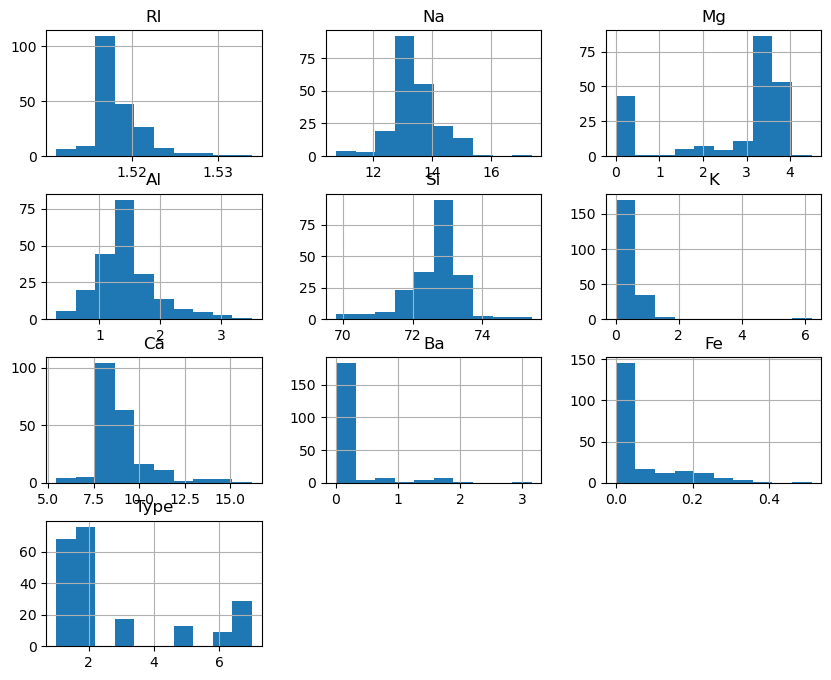

In [177]:
data2.hist()
plt.rcParams.update({'figure.figsize':(25,10), 'figure.dpi':200})

# By observing above chart , we can say that tha data is not distributed normally.

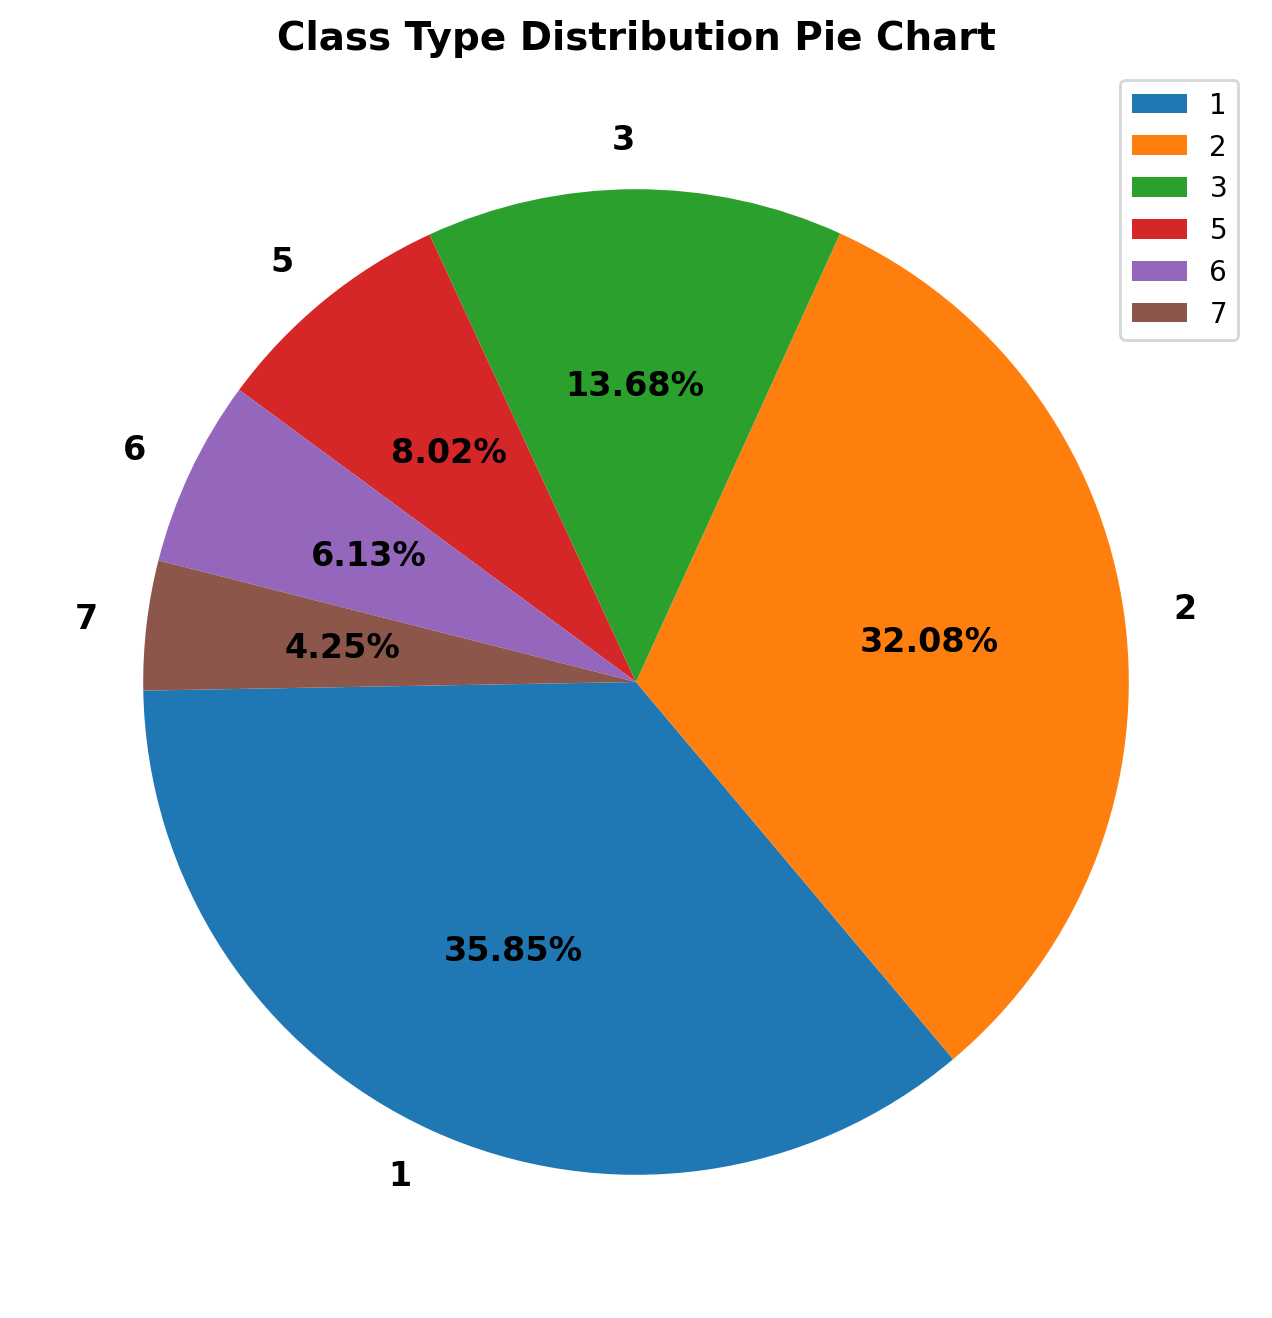

In [179]:
plt.figure(figsize=(10, 8))
plt.pie(data2['Type'].value_counts(), labels=data2.Type.unique(),
        autopct='%.2f%%', startangle=181, textprops={'size': 'large', 'fontweight': 'bold', 'color': 'black'})
plt.legend(loc='upper right')
plt.title("Class Type Distribution Pie Chart", fontsize=14, fontweight='bold')
plt.show()

# By observing the above chart, we must say the data contains maximum "Type 1" type and minimum "Type 7" type

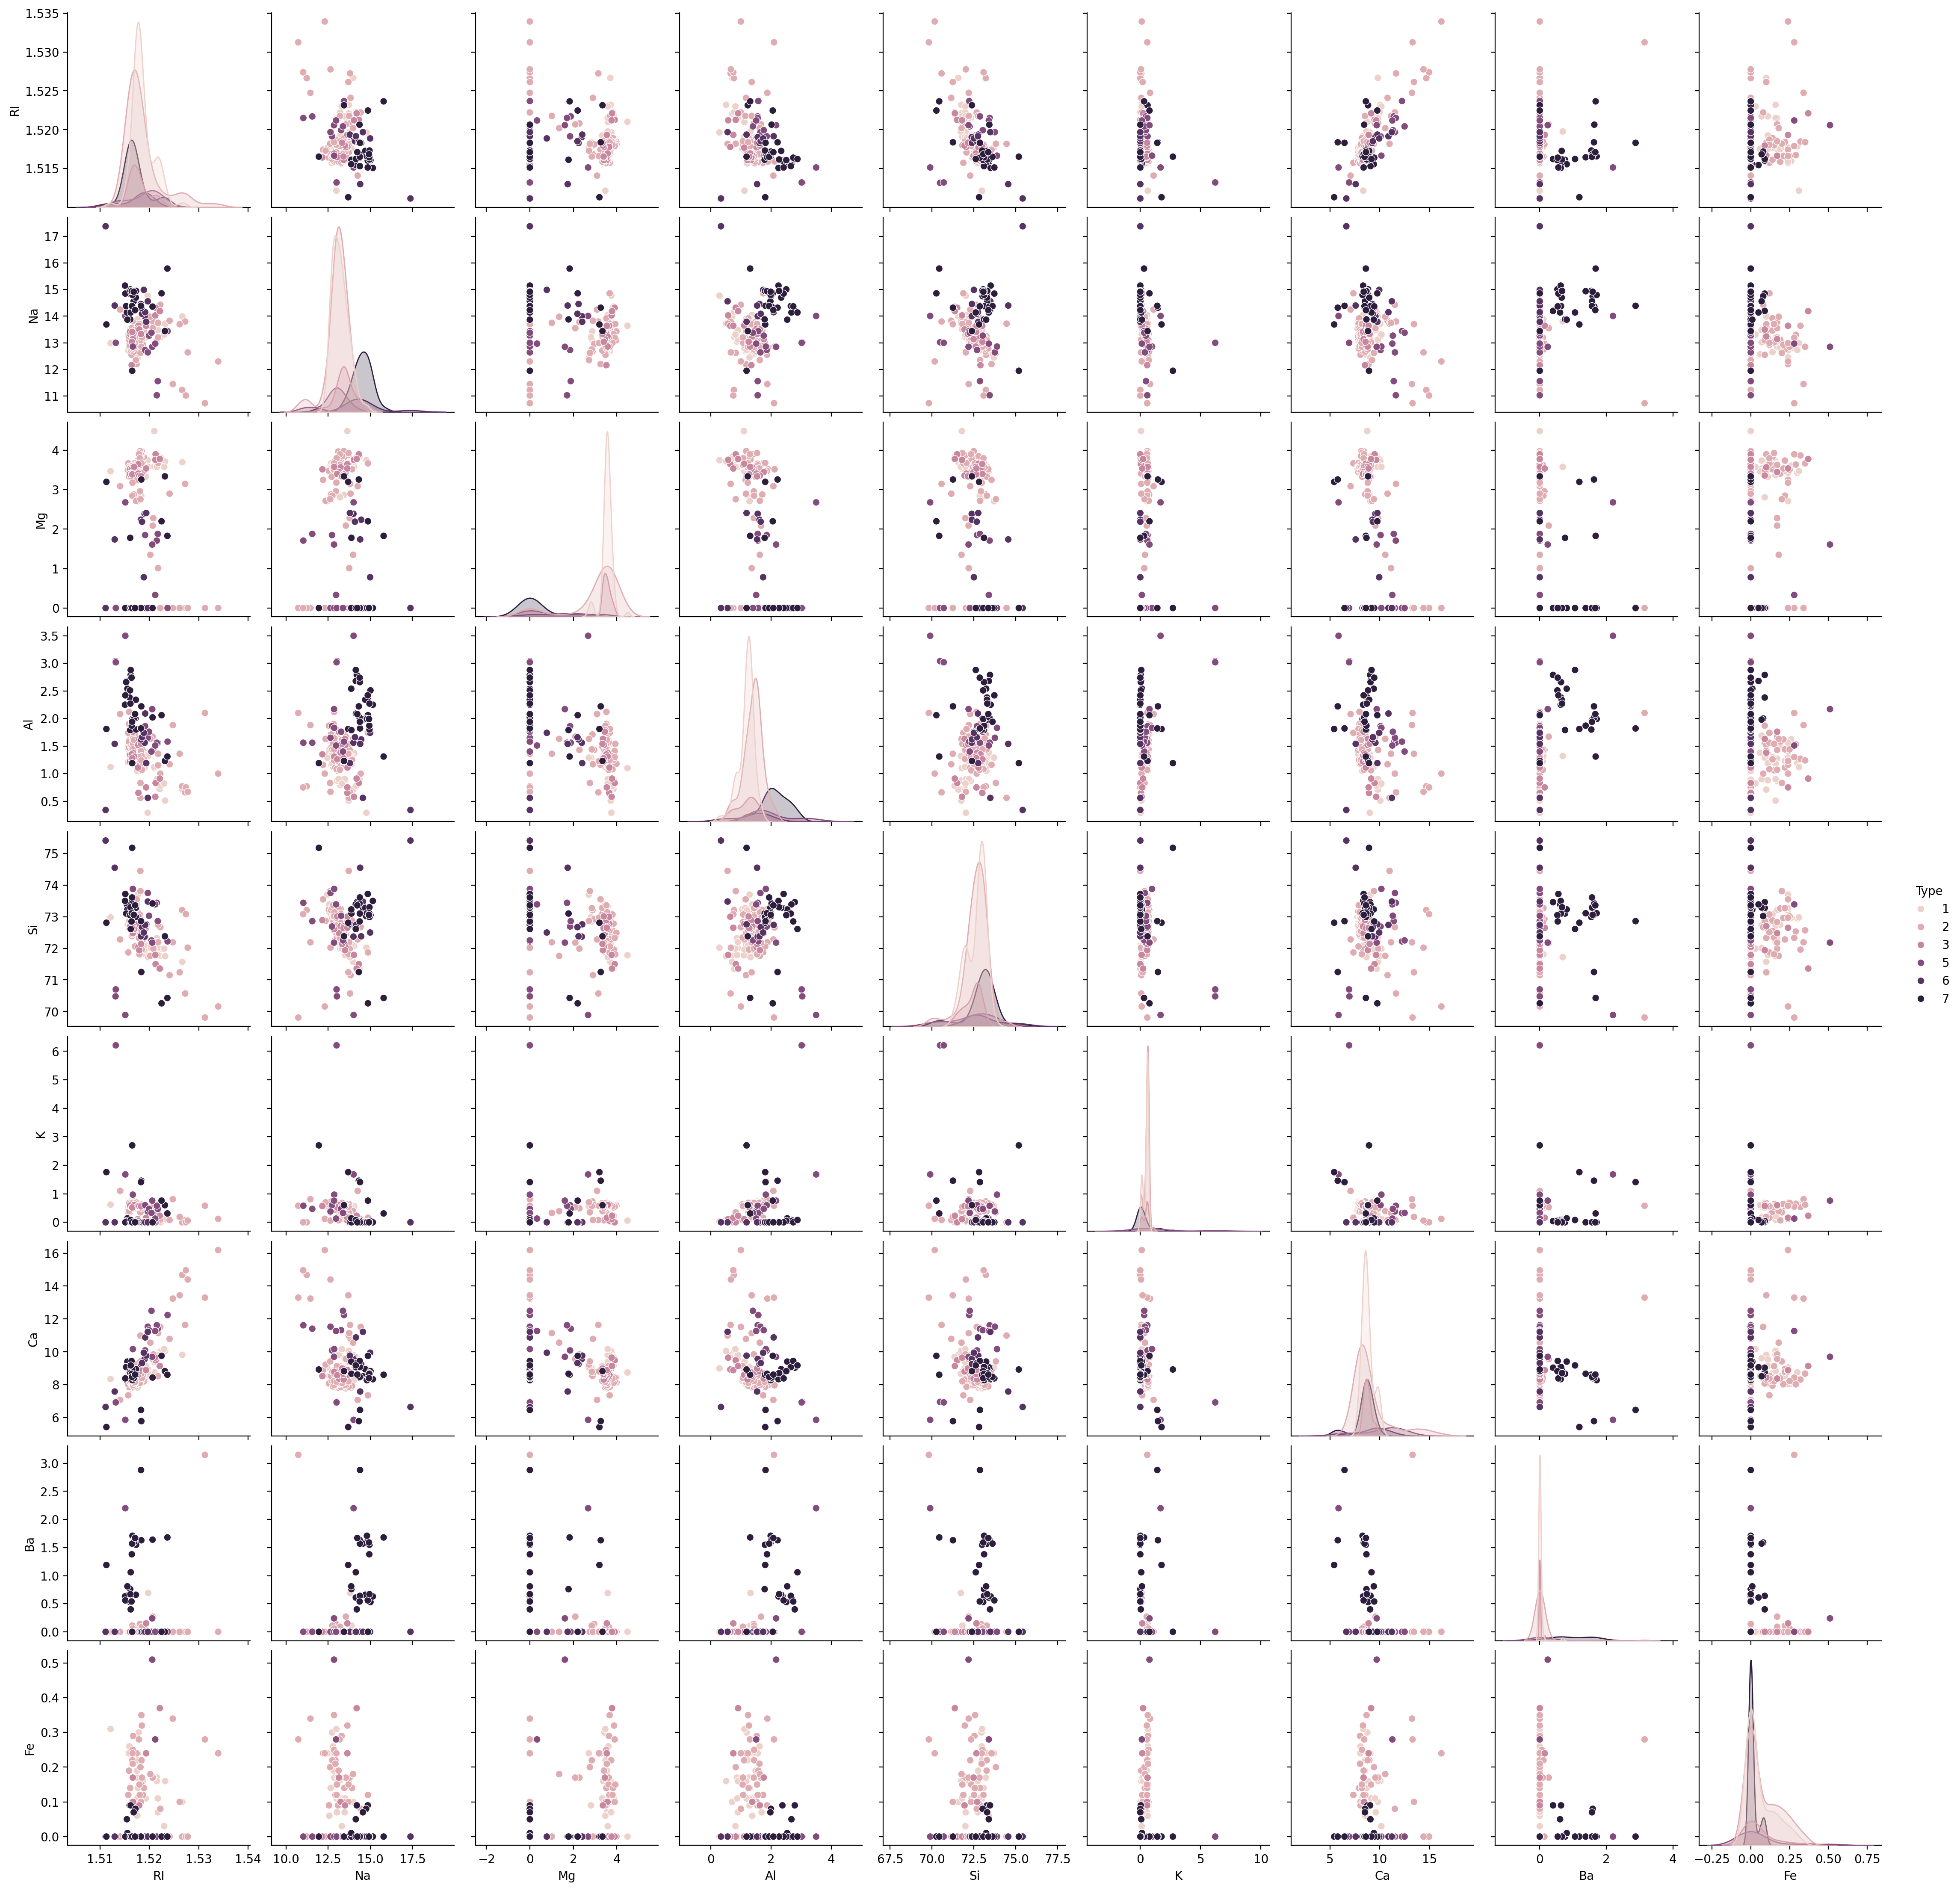

In [181]:
sns.pairplot(data2, hue='Type')

In [182]:
correlation = data2.corr()
correlation. style. background_gradient (cmap = 'BrBG')

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.205868,-0.132883,-0.394406,-0.535877,-0.285419,0.811986,0.003780,0.151233,-0.155960
Na,-0.205868,1.000000,-0.283188,0.179045,-0.059860,-0.262199,-0.280987,0.331594,-0.237371,0.514880
Mg,-0.132883,-0.283188,1.000000,-0.477312,-0.158882,0.009869,-0.448677,-0.491368,0.087825,-0.743385
Al,-0.394406,0.179045,-0.477312,1.000000,-0.027235,0.321362,-0.256519,0.481955,-0.086955,0.596025
Si,-0.535877,-0.059860,-0.158882,-0.027235,1.000000,-0.201301,-0.205532,-0.106665,-0.101294,0.143812
K,-0.285419,-0.262199,0.009869,0.321362,-0.201301,1.000000,-0.316219,-0.044699,-0.011047,-0.014890
Ca,0.811986,-0.280987,-0.448677,-0.256519,-0.205532,-0.316219,1.000000,-0.111567,0.127676,0.004426
Ba,0.003780,0.331594,-0.491368,0.481955,-0.106665,-0.044699,-0.111567,1.000000,-0.060778,0.574628
Fe,0.151233,-0.237371,0.087825,-0.086955,-0.101294,-0.011047,0.127676,-0.060778,1.000000,-0.193944
Type,-0.155960,0.514880,-0.743385,0.596025,0.143812,-0.014890,0.004426,0.574628,-0.193944,1.000000


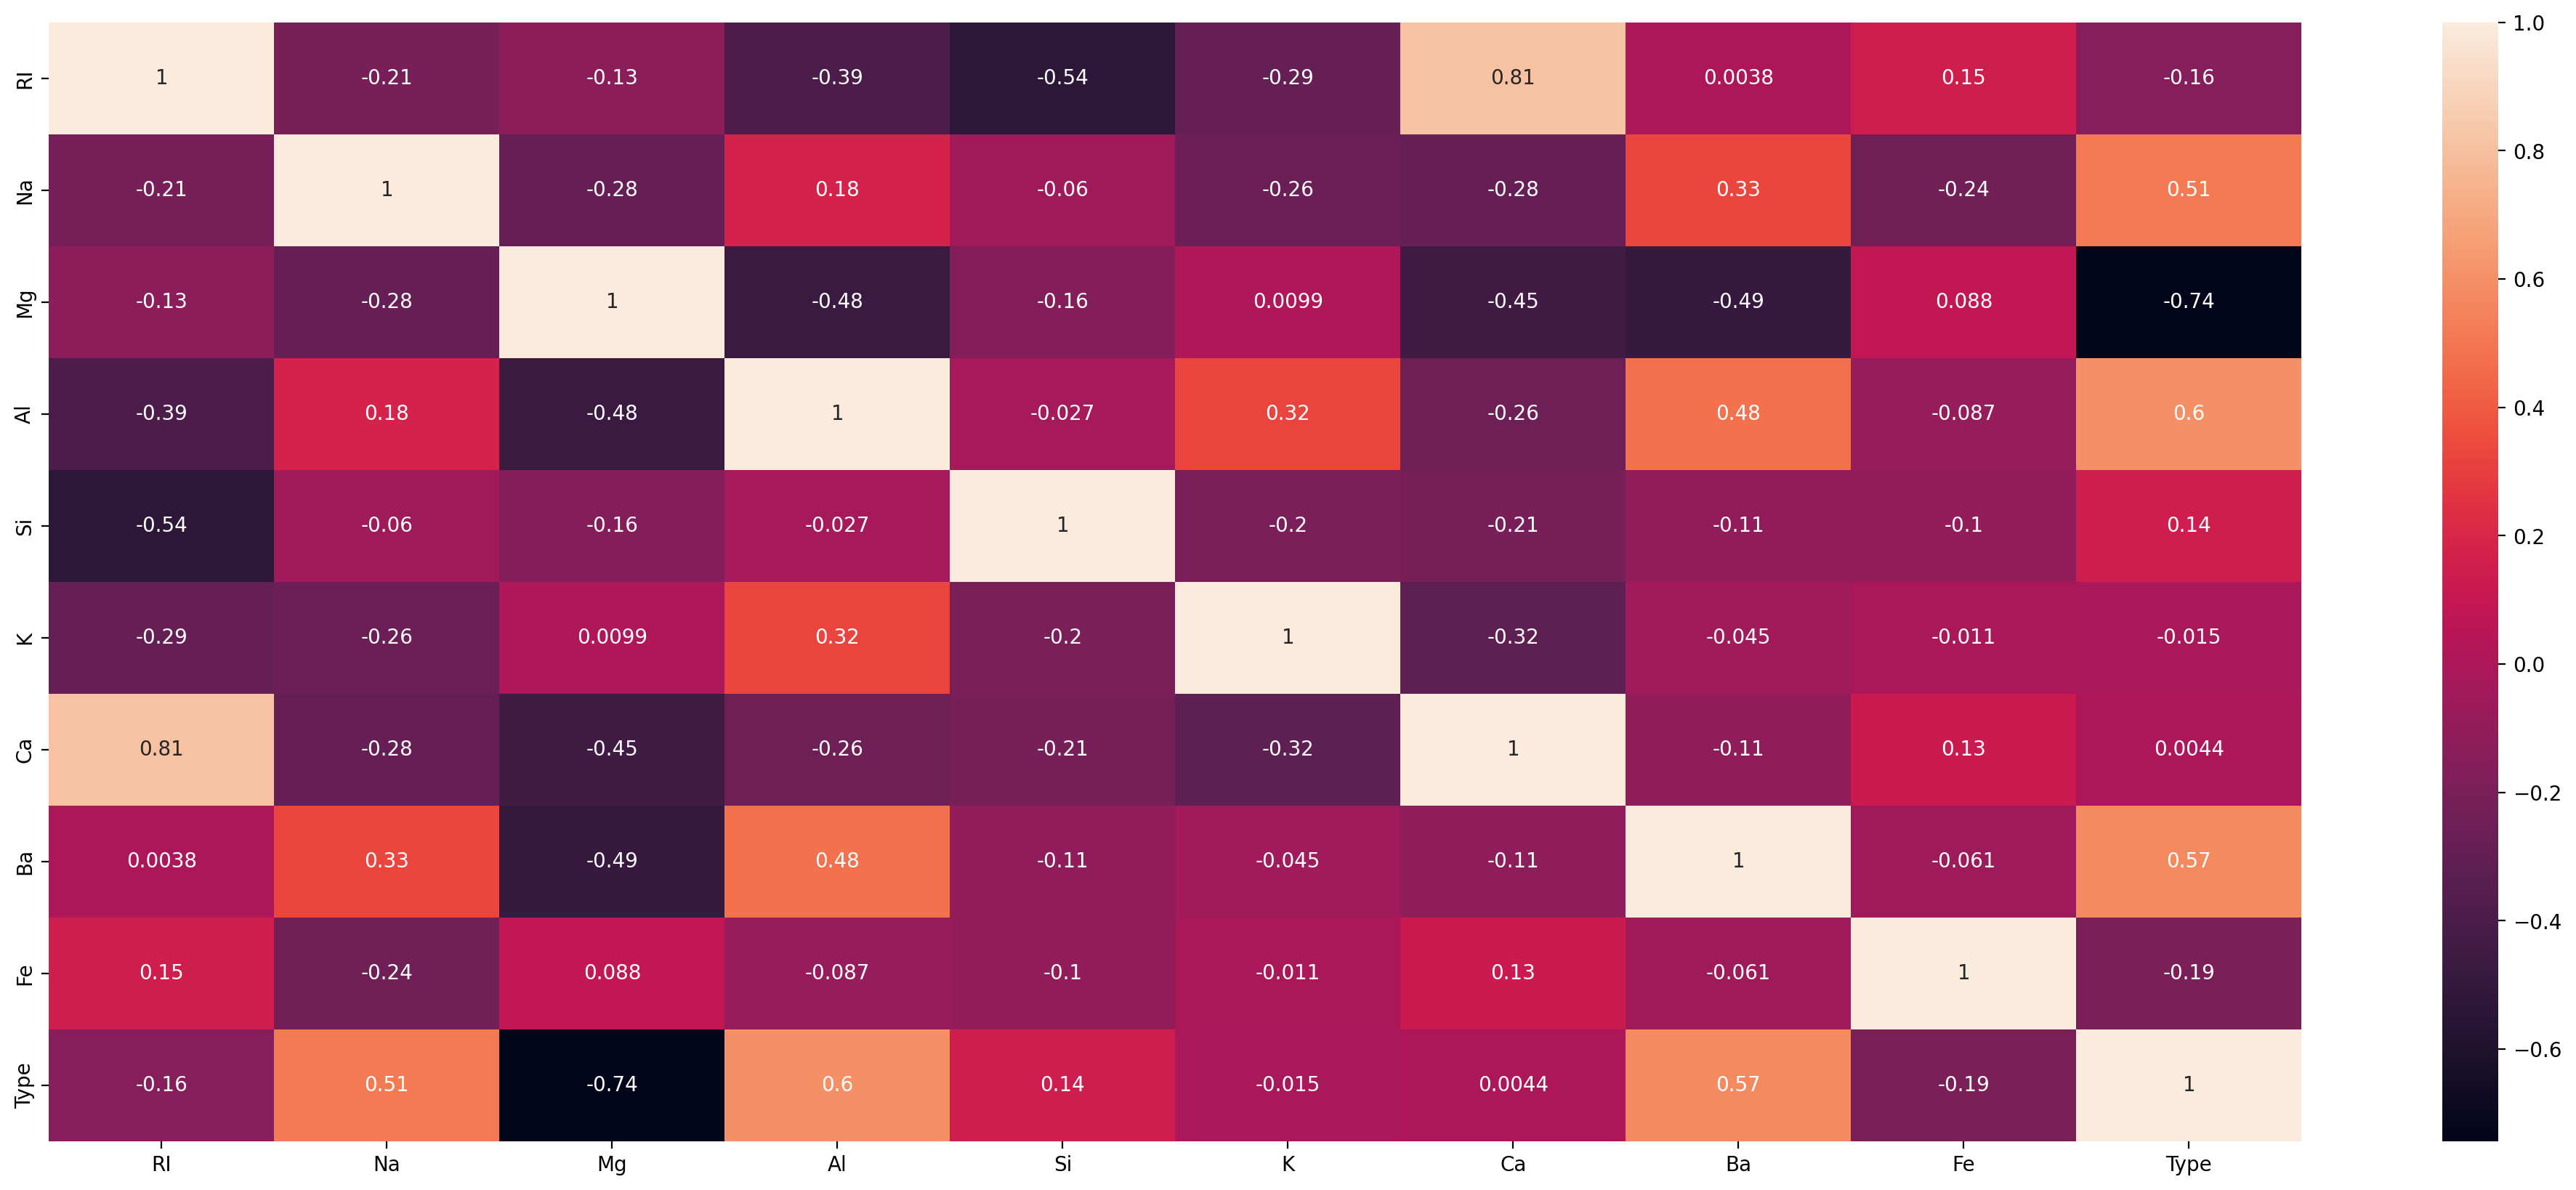

In [183]:
data2 = np.random.randint(low=1,high=100,size=(10, 10))
# plotting the heatmap
hm = sns.heatmap(data=correlation,annot=True)
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
# displaying the plotted heatmap
plt.show()

In [184]:
def get_correlated_feature_pairs(data, threshold=0.5):

    corr_matrix = data.corr().abs()  # Compute the absolute correlation matrix
    n_features = corr_matrix.shape[0]  # Number of features

    correlated_pairs = []  # List to store correlated feature pairs

    # Iterate through upper triangle of correlation matrix
    for i in range(n_features):
        for j in range(i+1, n_features):
            if corr_matrix.iloc[i, j] >= threshold:
                correlated_pairs.append((corr_matrix.index[i], corr_matrix.columns[j]))

    return correlated_pairs

In [185]:
correlated_pairs = get_correlated_feature_pairs(correlation, threshold=0.5)
print("Correlated Feature Pairs:")
for pair in correlated_pairs:
    print(pair)

Correlated Feature Pairs:
('RI', 'Al')
('RI', 'Si')
('RI', 'Ca')
('Na', 'Mg')
('Na', 'Al')
('Na', 'Ba')
('Na', 'Fe')
('Na', 'Type')
('Mg', 'Al')
('Mg', 'Ba')
('Mg', 'Type')
('Al', 'Ba')
('Al', 'Type')
('Ba', 'Type')
('Fe', 'Type')


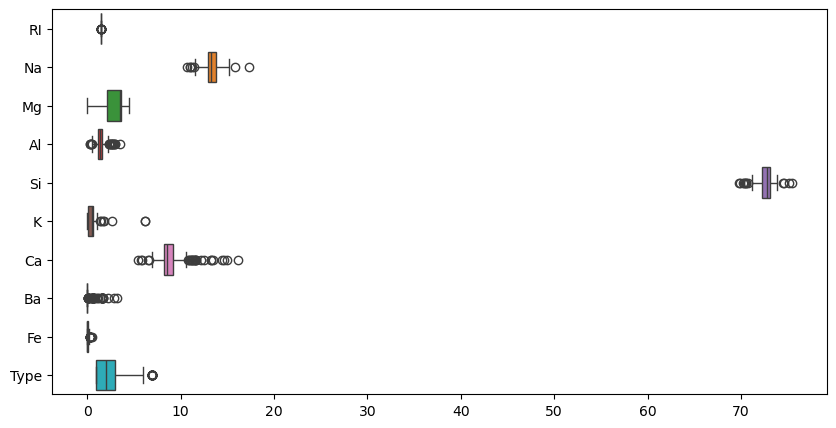

In [186]:
plt.figure(figsize=(10,5))
sns.boxplot(data=data, orient="h")
plt.show()

In [191]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [201]:
print(data1.head())

        RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     1


In [219]:
X = data1.drop('Type',axis = 1)
y = data1['Type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [221]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [223]:
ypred=rfc.predict(X_test)
ypred

array([1, 5, 2, 2, 1, 7, 1, 1, 1, 1, 2, 7, 1, 2, 1, 7, 5, 1, 7, 2, 2, 1,
       2, 7, 1, 1, 1, 7, 1, 6, 2, 5, 2, 1, 2, 3, 2, 2, 7, 1, 2, 5, 7, 5,
       2, 2, 2, 1, 2, 1, 1, 7, 2, 1, 2, 1, 1, 1, 1, 2, 5, 1, 2, 1],
      dtype=int64)

In [225]:
pd.crosstab(y_test,ypred)

col_0,1,2,3,5,6,7
Type,,,,,,
1,15,2,0,0,0,0
2,6,17,0,2,0,1
3,3,1,1,0,0,0
5,0,0,0,4,0,0
6,0,1,0,0,1,0
7,2,0,0,0,0,8


# Accuracy

In [228]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,ypred)

0.71875

In [230]:
# Create the base classifier
base_classifier = RandomForestClassifier()

# Number of base models (iterations)
n_estimators = 10

# Create the Bagging classifier
bagging_classifier = BaggingClassifier(estimator=base_classifier, n_estimators=n_estimators)

# Train the Bagging classifier
bagging_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = bagging_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.71875


# Instantiate Gradient Boosting Regressor

In [233]:
gbc = GradientBoostingClassifier(n_estimators=300,learning_rate=0.05,random_state=100,max_features=5 )
# Fit to training set
gbc.fit(X_train, y_train)
# Predict on test set
pred_y = gbc.predict(X_test)
# accuracy
acc = accuracy_score(y_test, pred_y)
print("Gradient Boosting Classifier accuracy is : {:.2f}".format(acc))

Gradient Boosting Classifier accuracy is : 0.78


# As we can see compare to all Gradient Boosting is giving best relust

# Interview Questions

# 1.Explain Bagging and Boosting methods. How is it different from each other.

+ Bagging : Bagging involves training multiple instances of a base learning algorithm on different subsets of the training data, typically using random sampling with replacement (bootstrap sampling). Each model is trained independently, and then their predictions are combined through averaging (for regression) or voting (for classification). The idea behind bagging is to reduce variance and prevent overfitting by introducing diversity among the models. A popular example of bagging is the Random Forest algorithm, which uses bagging with decision trees as base learner

+ Boosting: Boosting, on the other hand, involves training multiple weak learners sequentially, with each model trying to correct the mistakes made by its predecessor. Unlike bagging, where each model is trained independently, boosting learns from the mistakes of the previous models and gives more weight to the observations that were incorrectly predicted. Boosting algorithms typically assign different weights to the training instances based on their importance. Examples of boosting algorithms include AdaBoost (Adaptive Boosting), Gradient Boosting Machines (GBM), and XGBoost.s.

# 2.Explain how to handle imbalance in the data.

+ Resampling: Over-sampling: Increase the number of instances in the minority class by duplicating or generating synthetic samples. Techniques like SMOTE (Synthetic Minority Over-sampling Technique) create synthetic samples by interpolating between existing minority class samples. Under-sampling: Decrease the number of instances in the majority class by randomly removing samples.
+ However, this can lead to loss of information. Care should be taken to preserve the representativeness of the dataset. Algorithmic Approaches: Use algorithms that are robust to class imbalance, such as tree-based algorithms like Random Forest or gradient boosting machines (e.g., XGBoost, LightGBM).
+ These algorithms are less sensitive to class imbalance because they partition the feature space based on class purity. Utilize ensemble techniques like bagging and boosting, which can handle imbalanced data more effectively by combining multiple weak learners. Cost-sensitive Learning: Adjust the misclassification costs associated with different classes.
+ By assigning higher misclassification costs to minority classes, classifiers can learn to prioritize correctly classifying these instances. Some algorithms, like SVM (Support Vector Machines) and decision trees, allow for specifying class weights to penalize misclassification of minority classes. Evaluation Metrics: Choose appropriate evaluation metrics that are sensitive to class imbalance. Accuracy is not suitable for imbalanced datasets since it can be misleading.
+ Instead, use metrics like precision, recall, F1-score, ROC-AUC (Receiver Operating Characteristic - Area Under the Curve), and PR-AUC (Precision-Recall Area Under the Curve). Data Preprocessing: Normalize or standardize the data to ensure that features are on a similar scale. This can help algorithms converge faster and perform better, especially for distance-based algorithms like SVM. Feature engineering can also help in creating informative features that better discriminate between classes.
+ Ensemble Methods: Ensemble methods like bagging and boosting can also be effective in handling imbalanced data. By combining multiple models trained on different subsets of the data, these methods can reduce the impact of class imbalance on model performance. Advanced Techniques: Deep learning techniques like attention mechanisms, class weighting, and focal loss have been developed to address imbalanced data in neural networks specifically. Cost-sensitive learning algorithms, such as cost-sensitive SVM or cost-sensitive decision trees, explicitly consider the misclassification costs associated with different classes.